# DADOS DOS IDOSOS
---

Em resumo, antes de tudo:
1. Precisamos conhecer o contexto dos nossos dados
2. Precisamos saber qual a finalidade do trabalho
3. Precisamos conhecer o business que estamos trabalhando
4. Elaborar hipóteses

Após estes processos, nós iniciaremos nossa analise exploratória dos dados.

## 1) Conhecendo o contexto dos nossos dados
---

**Idade**: Está em dado contínuo (Parece que foi importante na Análise do Renan);  
**Sexo**: 1 para feminino e 2 para masculino;  
**Comorbidade**: Número de comorbidades;  
**Escolaridade**: Classificação (0 para analfabeto; 1 para dois a quatro anos de estudo; 2 para cinco a oito anos de estudo; 3 para nove a doze anos de estudo; 4 para mais de doze anos );  
**Diagnóstico**: 1 grupo de controle; 2 comprometimento cognitivo leve; 3 doença de alzheimer  
**Handgrip**: (Aparelho usado exercitar a musculatura, precisão motora e a força das mãos?): Está em Kg/Força, teste motor  
**IADL**: (Atividades Instrumentais de Vida Diária): 1 para disfuncional e 2 para funcional (a confirmar), teste funcional  
**BBS**: (Escala de Equilíbrio de Berg): Por pontuação (score varia de 0 - 56), teste motor  
**STS**: (Teste de Sentar e Levantar): Número de vezes que a pessoa senta e levanta da cadeira, teste motor  
**GSST**: (Velocidade da marcha em tarefas simples): velocidade em m/s, teste motor-cognitivo  
**GSDT**: (Velocidade da marcha em dupla tarefa): velocidade em m/s, teste motor-cognitivo  
**Delta GS**: (Subtração entre o GSST e GSDT) teste motor-cognitivo  
**DTC**: (Custo da dupla tarefa/dual task cost): em %, teste motor-cognitivo  
**STEP**: (número de repetições): Quantidade, teste motor  
**FMTIT**: (Tempo do Floor Maze imediato): tempo em segundos, teste cognitivo  
**FMTDT**: (Tempo do Floor Maze posterior): tempo em segundos, teste cognitivo  
**MMSE**: (Minimental): Pontuação ( 25 pontos ou mais é normal, entre 21-24 tem perda cognitiva leve, entre 10-20 é moderada e 9 ou menos é grave), teste cognitivo  
**CDT**: (Teste de relógio): Pontuação em erros (Entre 0 e 3: 0 erros, 3 erros, etc...), teste motor  
**TMTA**: (Teste de Atenção): Tempo em segundos, teste cognitivo  
**DSF**: (Digit Span Forward): Por pontuação, teste cognitivo  
**DSB**: (Digit Span Backwards): Por pontuação, teste cognitivo  
**VF**: (Fluência verbal): Número de Palavras, teste cognitivo  

## 2) Qual a finalidade do trabalho?
---

Este trabalho tem a finalidade de descobrir quais são as **variáveis mais relevantes** para classificar os idosos.

## 3) Conhecendo o business
---

### O que é a doença de Alzheimer?

A Doença de Alzheimer (DA) é um transtorno neurodegenerativo progressivo e fatal que se manifesta pela deterioração cognitiva e da memória, comprometimento progressivo das atividades de vida diária e uma variedade de sintomas neuropsiquiátricos e de alterações comportamentais. A doença instala-se quando o processamento de certas proteínas do sistema nervoso central começa a dar errado. Surgem, então, fragmentos de proteínas mal cortadas, tóxicas, dentro dos neurônios e nos espaços que existem entre eles. Como consequência dessa toxicidade, ocorre perda progressiva de neurônios em certas regiões do cérebro, como o hipocampo, que controla a memória, e o córtex cerebral, essencial para a linguagem e o raciocínio, memória, reconhecimento de estímulos sensoriais e pensamento abstrato.

A Doença de Alzheimer é a forma mais comum de demência neurodegenerativa em pessoas de idade, sendo responsável por mais da metade dos casos de demência nessa população.

### Estágios

**O quadro clínico costuma ser dividido em quatro estágios**:

- Estágio 1 (forma inicial): alterações na memória, na personalidade e nas habilidades visuais e espaciais;
- Estágio 2 (forma moderada): dificuldade para falar, realizar tarefas simples e coordenar movimentos. Agitação e insônia;
- Estágio 3 (forma grave): resistência à execução de tarefas diárias. Incontinência urinária e fecal. Dificuldade para comer. Deficiência motora progressiva;
- Estágio 4 (terminal): restrição ao leito. Mutismo. Dor à deglutição. Infecções intercorrentes.

### Sintomas

**Entre os principais sinais e sintomas do Alzheimer estão**:

- Falta de memória para acontecimentos recentes;
- Repetição da mesma pergunta várias vezes;
- Dificuldade para acompanhar conversações ou pensamentos complexos;
- Incapacidade de elaborar estratégias para resolver problemas;
- Dificuldade para dirigir automóvel e encontrar caminhos conhecidos;
- Dificuldade para encontrar palavras que exprimam ideias ou sentimentos pessoais;
- Irritabilidade, suspeição injustificada, agressividade, passividade, interpretações erradas de estímulos visuais ou auditivos, tendência ao isolamento.

### Fatores de risco

**Alguns fatores de risco para o Alzheimer são**:

- A idade e a história familiar: a demência é mais provável se a pessoa tem algum familiar que já sofreu do problema;
- Baixo nível de escolaridade: pessoas com maior nível de escolaridade geralmente executam atividades intelectuais mais complexas, que oferecem uma maior quantidade de estímulos cerebrais.

Fonte: https://www.gov.br/saude/pt-br/assuntos/saude-de-a-a-z/a/alzheimer




## Importando arquivos e packages

In [1]:
#visualizacao
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# manipulaca dos dados
import pandas as pd
import numpy as np

# machine learning e estatística
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import statsmodels.api as sm
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

pd.set_option("display.max_columns", None)

In [2]:
dados = pd.read_excel("Planilha de dados_projetoexercicio_031122.xlsx")
dados

,Diagnoses,Sex,Age,Comorbidities,Scholarity,Handgrip,IADL,BBS,STS,GSST,GSDT,delta GS,DTC,STEP,FMTIT,FMTDT,MMSE,CDT,TMTA,DSF,DSB,VF,Unnamed: 22
0,1.0,1.0,74.381930,0.0,4.0,24.4,1.0,56.0,15.0,0.831919,0.735736,0.096183,11.561562,82.0,18.42,13.28,29.0,3.0,46.26,7.0,6.0,13.0,NaN
1,1.0,1.0,72.588638,0.0,3.0,22.8,1.0,55.0,16.0,0.818030,0.782748,0.035282,4.313099,102.0,22.60,13.84,29.0,3.0,51.67,9.0,5.0,12.0,NaN
2,1.0,2.0,69.659138,0.0,3.0,57.2,1.0,56.0,11.0,0.822148,0.705036,0.117112,14.244604,93.0,14.75,11.42,26.0,3.0,72.26,5.0,4.0,18.0,NaN
3,1.0,2.0,72.991102,0.0,NaN,45.8,2.0,56.0,16.0,0.955166,0.829103,0.126062,13.197970,122.0,19.34,14.43,29.0,3.0,56.84,5.0,5.0,23.0,NaN
4,1.0,2.0,82.469541,0.0,4.0,31.4,1.0,55.0,14.0,0.917603,0.729167,0.188436,20.535714,109.0,11.30,10.37,28.0,3.0,49.49,7.0,8.0,20.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Diagnoses      109 non-null    float64
 1   Sex            109 non-null    float64
 2   Age            109 non-null    float64
 3   Comorbidities  99 non-null     float64
 4   Scholarity     105 non-null    float64
 5   Handgrip       100 non-null    float64
 6   IADL           105 non-null    float64
 7   BBS            109 non-null    float64
 8   STS            109 non-null    float64
 9   GSST           109 non-null    float64
 10  GSDT           109 non-null    float64
 11  delta GS       109 non-null    float64
 12  DTC            109 non-null    float64
 13  STEP           109 non-null    float64
 14  FMTIT          109 non-null    float64
 15  FMTDT          109 non-null    float64
 16  MMSE           109 non-null    float64
 17  CDT            102 non-null    float64
 18  TMTA      

Como a coluna "Unnamed: 22" tem apenas valores nulos, vamos remove-la.

In [3]:
dados = dados.loc[:108, "Diagnoses":"VF"]
dados

,Diagnoses,Sex,Age,Comorbidities,Scholarity,Handgrip,IADL,BBS,STS,GSST,GSDT,delta GS,DTC,STEP,FMTIT,FMTDT,MMSE,CDT,TMTA,DSF,DSB,VF
0,1.0,1.0,74.381930,0.0,4.0,24.4,1.0,56.0,15.0,0.831919,0.735736,0.096183,11.561562,82.0,18.42,13.28,29.0,3.0,46.26,7.0,6.0,13.0
1,1.0,1.0,72.588638,0.0,3.0,22.8,1.0,55.0,16.0,0.818030,0.782748,0.035282,4.313099,102.0,22.60,13.84,29.0,3.0,51.67,9.0,5.0,12.0
2,1.0,2.0,69.659138,0.0,3.0,57.2,1.0,56.0,11.0,0.822148,0.705036,0.117112,14.244604,93.0,14.75,11.42,26.0,3.0,72.26,5.0,4.0,18.0
3,1.0,2.0,72.991102,0.0,NaN,45.8,2.0,56.0,16.0,0.955166,0.829103,0.126062,13.197970,122.0,19.34,14.43,29.0,3.0,56.84,5.0,5.0,23.0
4,1.0,2.0,82.469541,0.0,4.0,31.4,1.0,55.0,14.0,0.917603,0.729167,0.188436,20.535714,109.0,11.30,10.37,28.0,3.0,49.49,7.0,8.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,3.0,2.0,72.136893,2.0,3.0,36.7,2.0,55.0,12.0,0.921659,0.569260,0.352399,38.235294,71.0,70.62,34.35,20.0,0.0,181.00,8.0,3.0,9.0
105,3.0,2.0,75.126626,2.0,2.0,35.2,2.0,56.0,11.0,0.722022,0.426136,0.295885,40.980114,57.0,22.60,35.99,22.0,2.0,99.03,5.0,2.0,15.0
106,3.0,1.0,81.524983,0.0,2.0,22.0,2.0,53.0,5.0,0.433213,0.345821,0.087392,20.172911,43.0,194.50,268.14,24.0,1.0,181.00,6.0,4.0,8.0
107,3.0,2.0,77.995893,4.0,3.0,27.7,2.0,56.0,10.0,0.806452,0.785340,0.021111,2.617801,99.0,84.74,281.31,21.0,2.0,42.90,7.0,2.0,11.0


## Escalonando os dados

In [13]:
dados_numericos = ['Age', 'Handgrip', 'BBS', 'STS', 'GSST', 'GSDT', 'delta GS', 'DTC', 'STEP', 'FMTIT', 'FMTDT', 'VF', 'TMTA', 'MMSE', 'DSB', 'DSF']
dados_categoricos = ['Sex', 'Comorbidities', 'Scholarity', 'IADL', 'CDT']

Tendo em vista que, os dados categóricos serão escalonados segundo o método One-Hot-Encode, assumindo os valores 0 ou 1, decidi aplicar o método MinMaxScaler. Dado que, no MinMaxScaler os valores ficarão entre os limites de 0 até 1, então os valores dos dados categóricos pré-processados não estarão muito distantes dos valores dos dados numéricos pré-processados.

### Aplicando o MinMaxScaler

- Definindo o modelo

In [14]:
preprocessador_num = MinMaxScaler().fit(dados[dados_numericos])

- Transformando os dados numéricos

In [15]:
dados_num_preprocessado = preprocessador_num.transform(dados[dados_numericos])
dados_num_preprocessado

array([[0.35195922, 0.24942792, 1.        , ..., 0.96      , 0.6       ,
        0.33333333],
       [0.30098447, 0.21281465, 0.9375    , ..., 0.96      , 0.5       ,
        0.55555556],
       [0.21771275, 1.        , 1.        , ..., 0.84      , 0.4       ,
        0.11111111],
       ...,
       [0.55500214, 0.19450801, 0.8125    , ..., 0.76      , 0.4       ,
        0.22222222],
       [0.45468695, 0.32494279, 1.        , ..., 0.64      , 0.2       ,
        0.33333333],
       [0.72162341, 0.21281465, 0.625     , ..., 0.88      , 0.7       ,
        0.66666667]])

- Adicionando as colunas

In [16]:
dados_num_preprocessado = pd.DataFrame(dados_num_preprocessado, columns=dados_numericos)
dados_num_preprocessado

,Age,Handgrip,BBS,STS,GSST,GSDT,delta GS,DTC,STEP,FMTIT,FMTDT,VF,TMTA,MMSE,DSB,DSF
0,0.351959,0.249428,1.0000,0.647059,0.664430,0.588886,0.296738,0.339105,0.619048,0.030101,0.013103,0.444444,0.138381,0.96,0.6,0.333333
1,0.300984,0.212815,0.9375,0.705882,0.648466,0.640657,0.210330,0.251506,0.777778,0.044448,0.015024,0.407407,0.172976,0.96,0.5,0.555556
2,0.217713,1.000000,1.0000,0.411765,0.653199,0.555078,0.326433,0.371530,0.706349,0.017505,0.006723,0.629630,0.304643,0.84,0.4,0.111111
3,0.312425,0.739130,1.0000,0.705882,0.806099,0.691705,0.339133,0.358881,0.936508,0.033259,0.017047,0.814815,0.206037,0.96,0.5,0.111111
4,0.581851,0.409611,0.9375,0.588235,0.762922,0.581652,0.427631,0.447559,0.833333,0.005663,0.003121,0.703704,0.159036,0.92,0.8,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.288144,0.530892,0.9375,0.470588,0.767584,0.405557,0.660269,0.661462,0.531746,0.209267,0.085374,0.296296,1.000000,0.60,0.3,0.444444
105,0.373127,0.496568,1.0000,0.411765,0.538107,0.247945,0.580085,0.694634,0.420635,0.044448,0.091000,0.518519,0.475828,0.68,0.2,0.111111
106,0.555002,0.194508,0.8125,0.058824,0.206131,0.159499,0.284265,0.443175,0.309524,0.634460,0.887288,0.259259,1.000000,0.76,0.4,0.222222
107,0.454687,0.324943,1.0000,0.352941,0.635157,0.643512,0.190223,0.231018,0.753968,0.257731,0.932462,0.370370,0.116895,0.64,0.2,0.333333


- Vamos verificar se estão todos dentro do intervalo:

In [9]:
dados_num_preprocessado.describe()

,Age,Handgrip,BBS,STS,GSST,GSDT,delta GS,DTC,STEP,FMTIT,FMTDT,VF,TMTA,MMSE,DSB,DSF
count,109.000000,100.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,106.000000,105.000000,109.000000,108.000000,108.000000
mean,0.451570,0.266568,0.871560,0.426336,0.590748,0.465977,0.364146,0.433816,0.545435,0.246742,0.265761,0.478337,0.396438,0.787523,0.425000,0.317901
std,0.232370,0.184651,0.184551,0.185007,0.197322,0.223401,0.171807,0.195413,0.207639,0.318348,0.346636,0.226941,0.286684,0.219946,0.196761,0.235069
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285031,0.141304,0.812500,0.294118,0.463179,0.309254,0.240188,0.305719,0.412698,0.041737,0.022330,0.296296,0.191968,0.640000,0.300000,0.111111
50%,0.438577,0.224256,0.937500,0.411765,0.602694,0.445410,0.344043,0.439062,0.547619,0.084057,0.095081,0.481481,0.295051,0.880000,0.400000,0.333333
75%,0.592902,0.327803,1.000000,0.529412,0.742171,0.643512,0.464518,0.522522,0.698413,0.257731,0.389758,0.629630,0.533828,0.960000,0.600000,0.444444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Como podem ver, todos os valores estão entre 0 e 1.

### Escalonando as variáveis categóricas - One-Hot-Encode

In [17]:
dados_cat_preprocessado = pd.get_dummies(dados[dados_categoricos], columns=['Sex', 'Comorbidities', 'Scholarity', 'IADL', 'CDT'])
dados_cat_preprocessado

,Sex_1.0,Sex_2.0,Comorbidities_0.0,Comorbidities_1.0,Comorbidities_2.0,Comorbidities_3.0,Comorbidities_4.0,Comorbidities_5.0,Comorbidities_8.0,Scholarity_1.0,Scholarity_2.0,Scholarity_3.0,Scholarity_4.0,IADL_1.0,IADL_2.0,CDT_0.0,CDT_1.0,CDT_2.0,CDT_3.0
0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
2,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
105,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0
106,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
107,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0


### Adicionando os valores ausentes nos dados categóricos escalonados

- Comorbidities

In [18]:
dados_cat_preprocessado.loc[[57, 58, 60, 68, 69, 70, 77, 78, 93, 108], ['Comorbidities_0.0',	'Comorbidities_1.0',	'Comorbidities_2.0',	'Comorbidities_3.0',	'Comorbidities_4.0',	'Comorbidities_5.0',	'Comorbidities_8.0'	]] = dados_cat_preprocessado.loc[[57, 58, 60, 68, 69, 70, 77, 78, 93, 108], ['Comorbidities_0.0',	'Comorbidities_1.0',	'Comorbidities_2.0',	'Comorbidities_3.0',	'Comorbidities_4.0',	'Comorbidities_5.0',	'Comorbidities_8.0'	]].replace(0, np.nan)

- Scholarity

In [19]:
dados_cat_preprocessado.loc[[3, 68, 69, 70], ['Scholarity_1.0',	'Scholarity_2.0',	'Scholarity_3.0',	'Scholarity_4.0']] = dados_cat_preprocessado.loc[[3, 68, 69, 70], ['Scholarity_1.0',	'Scholarity_2.0',	'Scholarity_3.0',	'Scholarity_4.0']].replace(0, np.nan)

- IADL

In [20]:
dados_cat_preprocessado.loc[[10, 65, 66, 97], ['IADL_1.0',	'IADL_2.0']] = dados_cat_preprocessado.loc[[10, 65, 66, 97], ['IADL_1.0',	'IADL_2.0']].replace(0, np.nan)

- CDT

In [21]:
dados_cat_preprocessado.loc[[20, 48, 75, 78, 79, 89, 92], ['CDT_0.0',	'CDT_1.0',	'CDT_2.0',	'CDT_3.0']] = dados_cat_preprocessado.loc[[20, 48, 75, 78, 79, 89, 92], ['CDT_0.0',	'CDT_1.0',	'CDT_2.0',	'CDT_3.0']].replace(0, np.nan)

- Dropping binary columns duplicates

In [23]:
dados_cat_preprocessado = dados_cat_preprocessado.drop(['Sex_2.0', 'IADL_2.0'], axis=1)

- Unindo os dados numéricos e categóricos processados

In [25]:
dados_processados = pd.merge(dados_num_preprocessado.reset_index(), dados_cat_preprocessado.reset_index())
dados_processados = dados_processados.loc[:, 'Age':'CDT_3.0']
dados_processados

,Age,Handgrip,BBS,STS,GSST,GSDT,delta GS,DTC,STEP,FMTIT,FMTDT,VF,TMTA,MMSE,DSB,DSF,Sex_1.0,Comorbidities_0.0,Comorbidities_1.0,Comorbidities_2.0,Comorbidities_3.0,Comorbidities_4.0,Comorbidities_5.0,Comorbidities_8.0,Scholarity_1.0,Scholarity_2.0,Scholarity_3.0,Scholarity_4.0,IADL_1.0,CDT_0.0,CDT_1.0,CDT_2.0,CDT_3.0
0,0.351959,0.249428,1.0000,0.647059,0.664430,0.588886,0.296738,0.339105,0.619048,0.030101,0.013103,0.444444,0.138381,0.96,0.6,0.333333,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.300984,0.212815,0.9375,0.705882,0.648466,0.640657,0.210330,0.251506,0.777778,0.044448,0.015024,0.407407,0.172976,0.96,0.5,0.555556,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.217713,1.000000,1.0000,0.411765,0.653199,0.555078,0.326433,0.371530,0.706349,0.017505,0.006723,0.629630,0.304643,0.84,0.4,0.111111,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.312425,0.739130,1.0000,0.705882,0.806099,0.691705,0.339133,0.358881,0.936508,0.033259,0.017047,0.814815,0.206037,0.96,0.5,0.111111,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
4,0.581851,0.409611,0.9375,0.588235,0.762922,0.581652,0.427631,0.447559,0.833333,0.005663,0.003121,0.703704,0.159036,0.92,0.8,0.333333,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.288144,0.530892,0.9375,0.470588,0.767584,0.405557,0.660269,0.661462,0.531746,0.209267,0.085374,0.296296,1.000000,0.60,0.3,0.444444,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
105,0.373127,0.496568,1.0000,0.411765,0.538107,0.247945,0.580085,0.694634,0.420635,0.044448,0.091000,0.518519,0.475828,0.68,0.2,0.111111,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
106,0.555002,0.194508,0.8125,0.058824,0.206131,0.159499,0.284265,0.443175,0.309524,0.634460,0.887288,0.259259,1.000000,0.76,0.4,0.222222,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
107,0.454687,0.324943,1.0000,0.352941,0.635157,0.643512,0.190223,0.231018,0.753968,0.257731,0.932462,0.370370,0.116895,0.64,0.2,0.333333,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Tratando os NaN values



| Variável categórica | Linhas c/ NaN values |
|----------|--------------------|
|Comorbidities | 57, 58, 60, 68, 69, 70, 77, 78, 93, 108 |
| IADL | 10, 65, 66, 97 |
| Scholarity | 3, 68, 69, 70 |
| CDT | 20, 48, 75, 78, 79, 89, 92 |

In [26]:
dados_faltantes = dados.loc[((dados['Scholarity'].isna() == True) | (dados['Comorbidities'].isna() == True) | (dados['Sex'].isna() == True) | (dados['IADL'].isna() == True) | (dados['CDT'].isna() == True) | (dados['Handgrip'].isna() == True) | (dados['TMTA'].isna() == True) | (dados['DSB'].isna() == True) | (dados['DSF'].isna() == True) | (dados['VF'].isna() == True))]

**Das colunas com valores ausentes temos**:  
Comorbidities com 10; int  
Scholarity com 4; int  
Handgrip com 9; float  
IADL com 4; int  
CDT com 7; int  
TMTA com 4; float  
DSF com 1; int  
DSB com 1; int  
VF com 3. int  



### Aplicando KNNImputer

- Gerando o modelo

In [27]:
modelo = KNNImputer(weights='distance', n_neighbors= 1)

- Ajustando aos dados do dataframe

In [28]:
meu_array = modelo.fit_transform(dados_processados)
meu_array

array([[0.35195922, 0.24942792, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.30098447, 0.21281465, 0.9375    , ..., 0.        , 0.        ,
        1.        ],
       [0.21771275, 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.55500214, 0.19450801, 0.8125    , ..., 1.        , 0.        ,
        0.        ],
       [0.45468695, 0.32494279, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.72162341, 0.21281465, 0.625     , ..., 0.        , 0.        ,
        1.        ]])

- Adicionando colunas ao array

In [29]:
dados_preenchidos = pd.DataFrame(meu_array, columns = dados_processados.columns)
dados_preenchidos

,Age,Handgrip,BBS,STS,GSST,GSDT,delta GS,DTC,STEP,FMTIT,FMTDT,VF,TMTA,MMSE,DSB,DSF,Sex_1.0,Comorbidities_0.0,Comorbidities_1.0,Comorbidities_2.0,Comorbidities_3.0,Comorbidities_4.0,Comorbidities_5.0,Comorbidities_8.0,Scholarity_1.0,Scholarity_2.0,Scholarity_3.0,Scholarity_4.0,IADL_1.0,CDT_0.0,CDT_1.0,CDT_2.0,CDT_3.0
0,0.351959,0.249428,1.0000,0.647059,0.664430,0.588886,0.296738,0.339105,0.619048,0.030101,0.013103,0.444444,0.138381,0.96,0.6,0.333333,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.300984,0.212815,0.9375,0.705882,0.648466,0.640657,0.210330,0.251506,0.777778,0.044448,0.015024,0.407407,0.172976,0.96,0.5,0.555556,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.217713,1.000000,1.0000,0.411765,0.653199,0.555078,0.326433,0.371530,0.706349,0.017505,0.006723,0.629630,0.304643,0.84,0.4,0.111111,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.312425,0.739130,1.0000,0.705882,0.806099,0.691705,0.339133,0.358881,0.936508,0.033259,0.017047,0.814815,0.206037,0.96,0.5,0.111111,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.581851,0.409611,0.9375,0.588235,0.762922,0.581652,0.427631,0.447559,0.833333,0.005663,0.003121,0.703704,0.159036,0.92,0.8,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.288144,0.530892,0.9375,0.470588,0.767584,0.405557,0.660269,0.661462,0.531746,0.209267,0.085374,0.296296,1.000000,0.60,0.3,0.444444,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
105,0.373127,0.496568,1.0000,0.411765,0.538107,0.247945,0.580085,0.694634,0.420635,0.044448,0.091000,0.518519,0.475828,0.68,0.2,0.111111,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
106,0.555002,0.194508,0.8125,0.058824,0.206131,0.159499,0.284265,0.443175,0.309524,0.634460,0.887288,0.259259,1.000000,0.76,0.4,0.222222,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
107,0.454687,0.324943,1.0000,0.352941,0.635157,0.643512,0.190223,0.231018,0.753968,0.257731,0.932462,0.370370,0.116895,0.64,0.2,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


- O código abaixo mostra se há dados ausentes nas colunas

In [22]:
dados_preenchidos.isna().sum()

Age                  0
Handgrip             0
BBS                  0
STS                  0
GSST                 0
GSDT                 0
delta GS             0
DTC                  0
STEP                 0
FMTIT                0
FMTDT                0
VF                   0
TMTA                 0
MMSE                 0
DSB                  0
DSF                  0
Sex_1.0              0
Comorbidities_0.0    0
Comorbidities_1.0    0
Comorbidities_2.0    0
Comorbidities_3.0    0
Comorbidities_4.0    0
Comorbidities_5.0    0
Comorbidities_8.0    0
Scholarity_1.0       0
Scholarity_2.0       0
Scholarity_3.0       0
Scholarity_4.0       0
IADL_1.0             0
CDT_0.0              0
CDT_1.0              0
CDT_2.0              0
CDT_3.0              0
dtype: int64

## Análise exploratória

**Nesta etapa, nosso maior objetivo é descobri qual é a variável mais importante.**

- Separando os dados originais, ou seja, sem manipulação de técnicas de preenchimento dos dados sintéticos, ou seja, onde houve manipulação de técnicas de preenchimento.

In [31]:
list_true_nan = dados.isna().apply(lambda x: x.sum(), axis=1) > 0 
dados_validos = dados_preenchidos[~list_true_nan]
dados_nan =  dados_preenchidos[list_true_nan]

1. Se 80% for pra teste terísmos 87 dados sem separação
2. Se 70% dos dados válidos forem pro treino + 31 dos dados nan teremos 86 dados


In [32]:
dados_validos.shape, dados_nan.shape

((78, 33), (31, 33))

**Separando nosso dataset**

- Separando Dados válidos

In [33]:
X_treino_val, X_validador, y_treino_val, y_validador = train_test_split(dados_validos, dados.loc[~list_true_nan, 'Diagnoses'], test_size=0.3, random_state=2)

- Agregando os dados preenchidos ao treino

In [34]:
X_treino_val.shape, dados_nan.shape

((54, 33), (31, 33))

In [35]:
X_treino = pd.concat([X_treino_val, dados_nan], axis=0)
y_treino = pd.concat([y_treino_val, dados.loc[list_true_nan, 'Diagnoses']])
X_treino.shape, y_treino.shape

((85, 33), (85,))

### Random Forest Feature Importance

- Gerando o modelo

In [28]:
modelo_tree = RandomForestClassifier(random_state=4)

- Otimizando hiperparametros

In [32]:
dicionario_parametros = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [4,5,6,7,8],
    'max_features': [3, 6, 12, 18, 24],
    'criterion': ['gini', 'entropy', 'log_loss']
}

In [34]:
gs = RandomizedSearchCV(
    estimator=modelo_tree,
    param_distributions=dicionario_parametros,
    scoring='accuracy',
    cv=5,
    n_iter=112
).fit(X_treino, y_treino)
# 43 minutos rodando

c:\Users\jeffe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\jeffe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jeffe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\Users\jeffe\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\jeffe\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\Users\jeffe\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

- Verificando o melhores parametros

In [35]:
gs.best_params_

{'n_estimators': 500, 'max_features': 6, 'max_depth': 7, 'criterion': 'gini'}

- Aplicando o modelo com os parâmetros tunados

In [36]:
modelo_tree = RandomForestClassifier(random_state=4, criterion='gini', max_depth=7, n_estimators=500, max_features=6 ).fit(X_treino, y_treino)

- Verificando a acurácia

In [37]:
modelo_tree.score(X_validador, y_validador) # O R² do modelo

0.8333333333333334

- Plotando a matriz de confusão

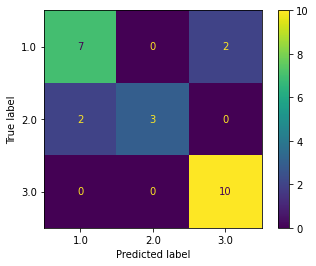

In [38]:
predictions = modelo_tree.predict(X_validador)
cm = confusion_matrix(y_validador, predictions, labels=modelo_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=modelo_tree.classes_)
disp.plot()
plt.show()

- Exibindo as métricas de exatidão

In [39]:
print(classification_report(y_validador, predictions))

              precision    recall  f1-score   support

         1.0       0.78      0.78      0.78         9
         2.0       1.00      0.60      0.75         5
         3.0       0.83      1.00      0.91        10

    accuracy                           0.83        24
   macro avg       0.87      0.79      0.81        24
weighted avg       0.85      0.83      0.83        24



### Verificando quais são as variáveis mais relevantes

- Recebendo os resultados da feature importance

In [40]:
importances = modelo_tree.feature_importances_

indices_ordenados = np.argsort(importances)[::-1]

for i in range(X_validador.shape[1]):
    print(f'{X_validador.columns[indices_ordenados[i]]}, {importances[indices_ordenados[i]]}')

MMSE, 0.12248126696683766
FMTIT, 0.10806435943148192
FMTDT, 0.0946737680594306
VF, 0.0872582114414557
GSDT, 0.06552438825395189
GSST, 0.05305893332143734
STEP, 0.041763813733543036
IADL_1.0, 0.04028509588811785
TMTA, 0.038203383632849516
Age, 0.037988803440566585
DTC, 0.03709895189783781
STS, 0.03301609148026862
Handgrip, 0.03131215870226896
delta GS, 0.029192330064561005
BBS, 0.02811471902564555
CDT_3.0, 0.0274012756678396
DSB, 0.027199908903077604
DSF, 0.01785809106428951
Comorbidities_1.0, 0.01213997485452766
Comorbidities_3.0, 0.009517683999291272
Sex_1.0, 0.008392315571995742
CDT_0.0, 0.007602238563039741
CDT_2.0, 0.007245318944399111
CDT_1.0, 0.00679394288751847
Scholarity_4.0, 0.005647287982842171
Comorbidities_4.0, 0.005574927480811126
Scholarity_2.0, 0.0036191498801735836
Comorbidities_0.0, 0.0035346070225142174
Comorbidities_2.0, 0.003397386067444725
Scholarity_1.0, 0.0030951714675854724
Scholarity_3.0, 0.0029444443023960228
Comorbidities_8.0, 0.0
Comorbidities_5.0, 0.0


- Plotando o gráfico das pontuações das features

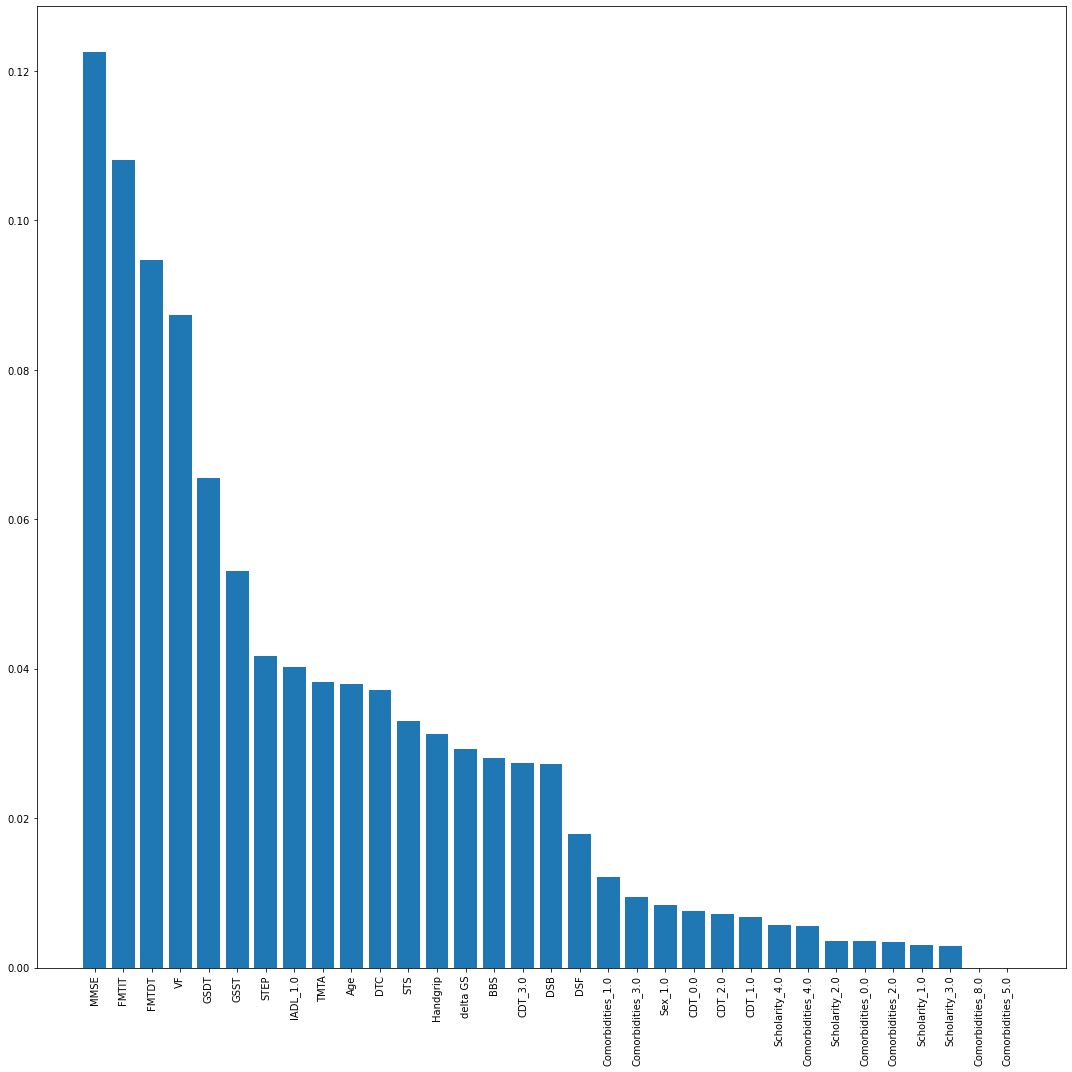

In [41]:
# plt.title('Feature Importance')
plt.figure(figsize=(15, 15))
plt.bar(range(X_validador.shape[1]), importances[indices_ordenados], align='center')
plt.xticks(range(X_validador.shape[1]), X_treino.columns[indices_ordenados], rotation=90)
plt.savefig('Feature_importance.jpeg')
plt.tight_layout()
plt.show()



- Visualizando a árvore de decisão

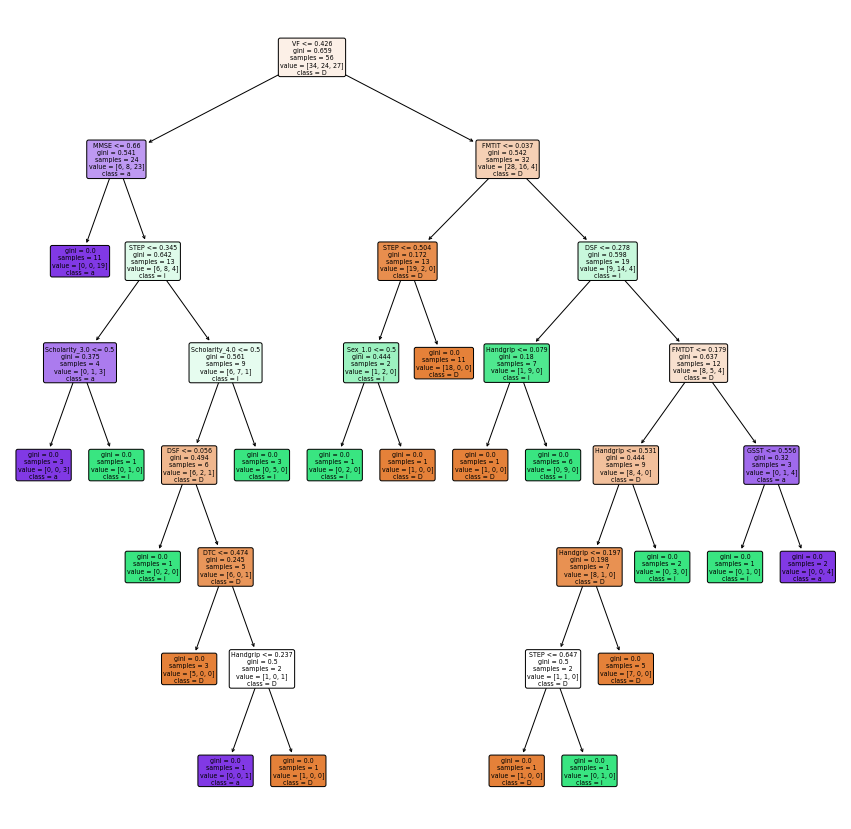

In [42]:
plt.figure(figsize=(15, 15))
_= tree.plot_tree(
    modelo_tree.estimators_[2],
    feature_names = X_validador.columns,
    class_names = 'Diagnoses',
    filled=True,
    rounded=True
)
# plt.savefig('Arvore_decisao.jpeg')
# len(modelo_tree.estimators_) # Nº de árvores